In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
from pprint import pprint
import sqlite3
import yaml
import re
from datetime import datetime
import maya
from collections import Counter
from glob import glob
import ast
import json
import cProfile
import time
from sklearn.preprocessing import StandardScaler

try: # for pip >= 10
    from pip._internal.req import parse_requirements
except ImportError: # for pip <= 9.0.3
    from pip.req import parse_requirements

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import networkx as nx
import networkx.algorithms.community as nxcom

import bokeh.io
from bokeh.io import output_file, show
from bokeh.resources import INLINE
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,
                         BoxZoomTool, ResetTool, OpenURL, CustomJS, Column, SaveTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook
from bokeh.models.graphs import from_networkx
from bokeh.models import TextInput, Button

from scipy.spatial.distance import cosine

%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

/home/ubuntu/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Easier navigation:

------------------------------------

### 1. <a href='#setup'>Setup</a>
------------------------------------
### 2. <a href='#heatmap'>Heatmap</a>
### 3. <a href='#scatter'>Scatterplots</a>
### 4. <a href='#hist'>Histograms</a>
### 5. <a href='#other'>Other EDA</a>
------------------------------------
### 6. <a href='#dep'>Dependency Table and Iteration Tree Expansion</a>
### 7. <a href='#time'>`col`: Time</a>
### 8. <a href='#landlord'>Sample LANDLORD Setup</a>

<a name='setup'></a>
## 1. Setup


<br>

In [5]:
with open('q_df.txt') as f:
    reloaded_example = json.load(f)

In [6]:
df = pd.read_json(reloaded_example)
tm = "real"
df["Observed Outgoing Dep"] = df["Outgoing Dep"] - df["dependencies drained count"]
df

,library,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,...,real_time_constant_max,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep
0,cutecharts,[jinja2],1.296,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,2.0,56.0,2.0,11.0,503.0,3.0,...,0.757,"[markupsafe, jinja2]",0,2,0.000431,0.000000,0.188,[],0,2
1,postgres,"[psycopg2-binary, psycopg2-pool]",0.144,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,17.0,16.0,12.0,55.0,12.0,...,0.760,"[psycopg2-pool, psycopg2-binary]",0,2,0.000431,0.000000,0.144,[],0,2
2,gpustat,"[six, nvidia-ml-py3, psutil, blessings]",1.864,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,10.0,202.0,23.0,16.0,2479.0,11.0,...,0.743,"[psutil, blessings, six, nvidia-ml-py3]",1,4,0.001078,0.000017,0.088,[],0,4
3,df2gspread,"[argparse, google-api-python-client, gspread, ...",82.632,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,26.0,12.0,10.0,117.0,21.0,...,1.105,"[idna, google-api-core, certifi, google-api-py...",0,31,0.006684,0.000000,0.000,[],0,31
4,ddeint,"[numpy, scipy]",87.040,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,4.0,NaN,4.0,...,0.790,"[scipy, numpy]",0,2,0.000431,0.000000,0.040,[],0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,hep-ml,"[theano, numpy, pandas, six, scipy, scikit-learn]",157.900,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,8.0,48.0,NaN,11.0,131.0,7.0,...,0.906,"[pytz, pandas, six, python-dateutil, threadpoo...",0,10,0.002156,0.000000,0.000,[],0,10
4571,pyats.aetest,"[pyats.results, pyats.aereport, jinja2, pyats....",66.252,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,5.0,NaN,40.0,...,1.099,"[idna, dill, multidict, pycparser, psutil, asy...",7,37,0.009487,0.000074,39.512,"[async-lru, unicon.plugins, yamllint, pyats.co...",13,24
4572,dicrivers,[],0.040,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,1.0,0.0,NaN,5.0,1.0,1.0,...,0.784,[],0,0,0.000000,0.000000,0.040,[],0,0
4573,airr,"[pandas, pyyaml, yamlordereddictloader, setupt...",75.040,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,9.0,NaN,5.0,...,0.846,"[yamlordereddictloader, pyyaml, setuptools, py...",0,8,0.001725,0.000000,0.240,[],0,8


In [5]:
df.columns

Index(['library', 'dependencies', 'total size', 'size_full', 'Contributors',
       'Forks', 'Open Issues/PRs', 'SourceRank', 'Stars', 'Total releases',
       'Version Number', 'Version Time', 'Watchers', 'count',
       'real_time_solo_median', 'real_time_solo_average', 'real_time_solo_std',
       'real_time_solo_max', 'real_time_full_median', 'real_time_full_average',
       'real_time_full_std', 'real_time_full_max', 'real_time_constant_median',
       'real_time_constant_average', 'real_time_constant_std',
       'real_time_constant_max', 'dependencies full', 'Incoming Dep',
       'Outgoing Dep', 'Degree', 'Authority', 'size', 'dependencies drained',
       'dependencies drained count', 'Observed Outgoing Dep'],
      dtype='object')

<a name='heatmap'></a>
## 2. Heatmap

<br>

<AxesSubplot:>

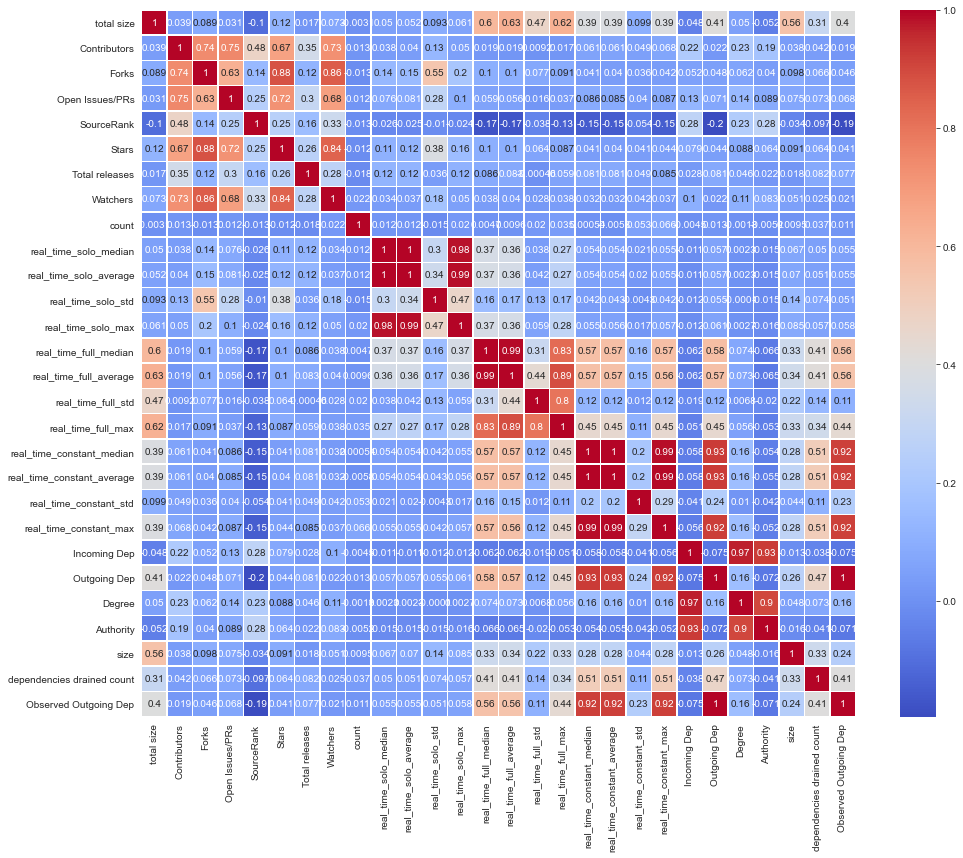

In [464]:
plt.figure(figsize=(16,13))
heatmap_df = df
#heatmap_df["real avg"] = heatmap_df["real avg"].astype(float)
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5)

<AxesSubplot:>

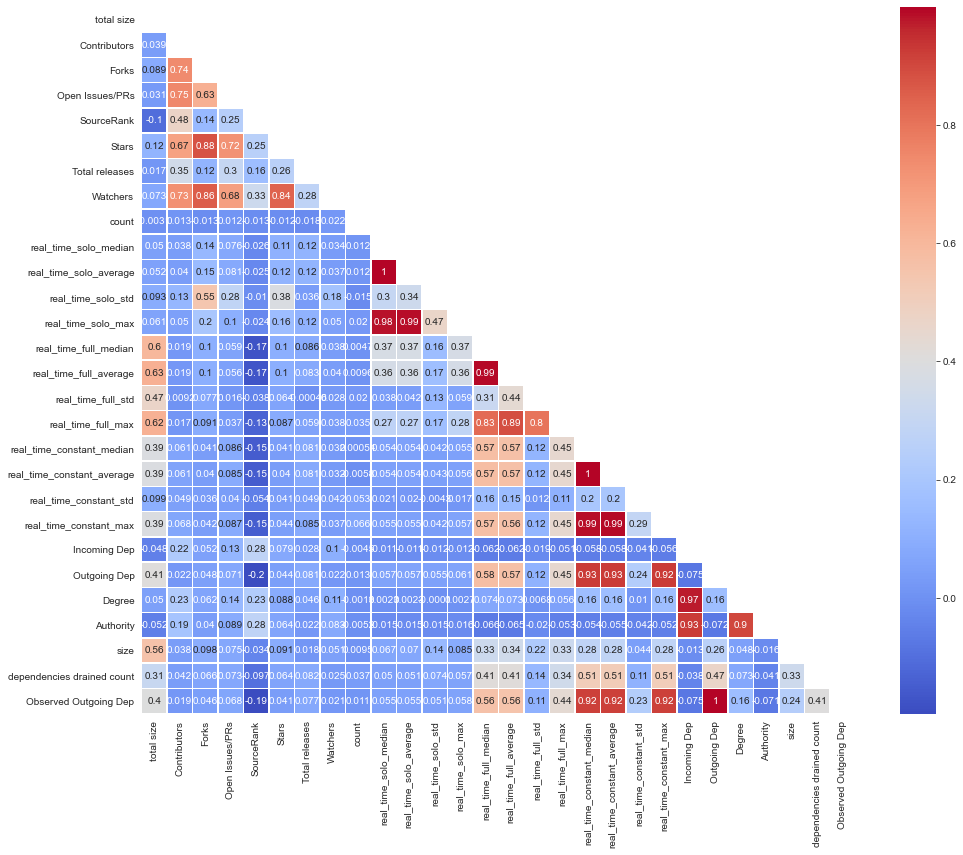

In [465]:
plt.figure(figsize=(16,13))
heatmap_df = df
#heatmap_df["real avg"] = heatmap_df["real avg"].astype(float)
corr = heatmap_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, mask=mask)

<a name='scatter'></a>
## 3. Scatterplots

<br>

<AxesSubplot:xlabel='total size', ylabel='real_time_full_median'>

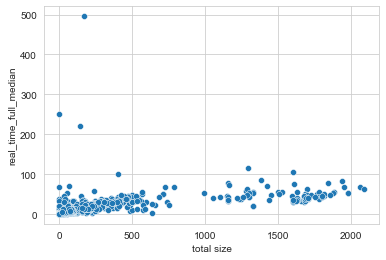

In [466]:
sns.scatterplot(x="total size", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='Contributors', ylabel='Open Issues/PRs'>

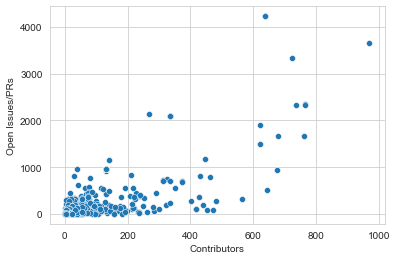

In [467]:
sns.scatterplot(x="Contributors", y="Open Issues/PRs", data=df)

<AxesSubplot:xlabel='Stars', ylabel='Forks'>

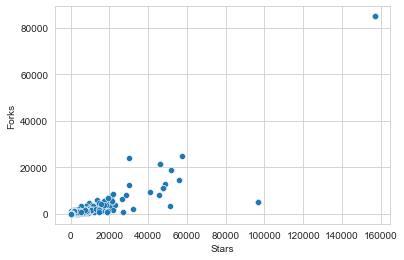

In [468]:
sns.scatterplot(x="Stars", y="Forks", data=df)

<AxesSubplot:xlabel='SourceRank', ylabel='real_time_full_median'>

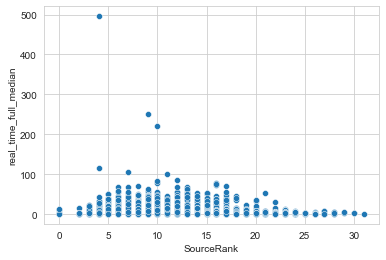

In [469]:
sns.scatterplot(x="SourceRank", y=tm + "_time_full_median", data=df)

Time against time:

<AxesSubplot:xlabel='real_time_solo_median', ylabel='real_time_full_median'>

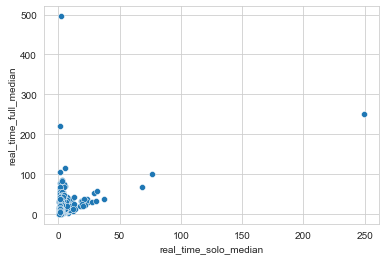

In [470]:
sns.scatterplot(x=tm + "_time_solo_median", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='real_time_solo_median', ylabel='real_time_constant_median'>

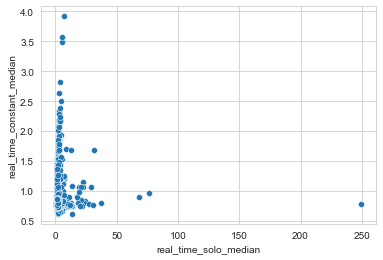

In [471]:
sns.scatterplot(x=tm + "_time_solo_median", y=tm + "_time_constant_median", data=df)

<AxesSubplot:xlabel='real_time_full_median', ylabel='real_time_constant_median'>

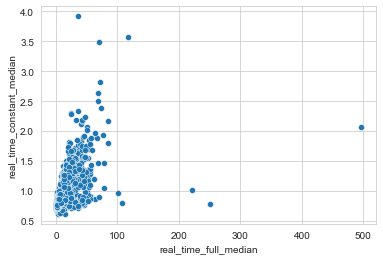

In [472]:
sns.scatterplot(x=tm + "_time_full_median", y=tm + "_time_constant_median", data=df)

Solo seems a little questionable so far, given its lower than expected correlation with individual size as well.

Authority = incoming dep

<AxesSubplot:xlabel='Incoming Dep', ylabel='Authority'>

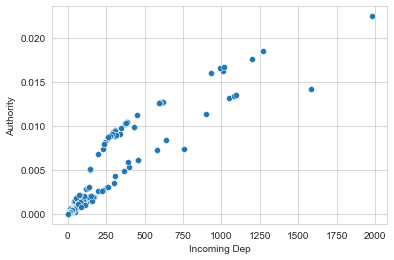

In [473]:
sns.scatterplot(x="Incoming Dep", y="Authority", data=df)

One thing confirmed here that I was curious about in the beginning was on how the constant time may be affected by number of dependencies for a package.

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_constant_median'>

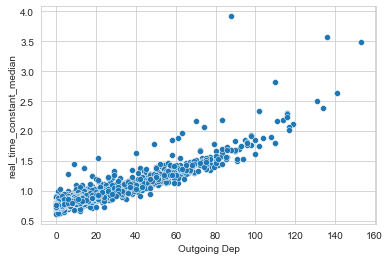

In [474]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_constant_median", data=df)

And it should have some effect on full time taken, but not on solo.

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_full_median'>

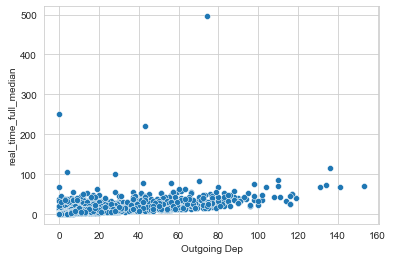

In [475]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_full_median", data=df)

<AxesSubplot:xlabel='Outgoing Dep', ylabel='real_time_solo_median'>

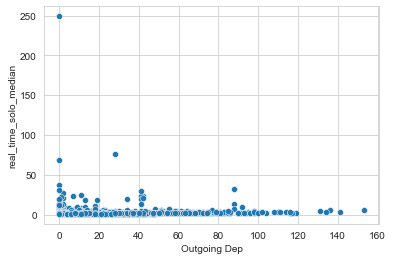

In [476]:
sns.scatterplot(x="Outgoing Dep", y=tm + "_time_solo_median", data=df)

<a name='hist'></a>
## 4. Histograms

<br>

In [477]:
df.columns

Index(['library', 'dependencies', 'total size', 'size_full', 'Contributors',
       'Forks', 'Open Issues/PRs', 'SourceRank', 'Stars', 'Total releases',
       'Version Number', 'Version Time', 'Watchers', 'count',
       'real_time_solo_median', 'real_time_solo_average', 'real_time_solo_std',
       'real_time_solo_max', 'real_time_full_median', 'real_time_full_average',
       'real_time_full_std', 'real_time_full_max', 'real_time_constant_median',
       'real_time_constant_average', 'real_time_constant_std',
       'real_time_constant_max', 'dependencies full', 'Incoming Dep',
       'Outgoing Dep', 'Degree', 'Authority', 'size', 'dependencies drained',
       'dependencies drained count', 'Observed Outgoing Dep'],
      dtype='object')

In [479]:
df1 = df.select_dtypes([np.int, np.float])

for col in df1.columns:
    if col != 'count' and col != "dependencies drained count":
        df1[col] = df1[(df1[col] > df1[col].quantile(0.00)) & (df1[col] < df1[col].quantile(0.90))]

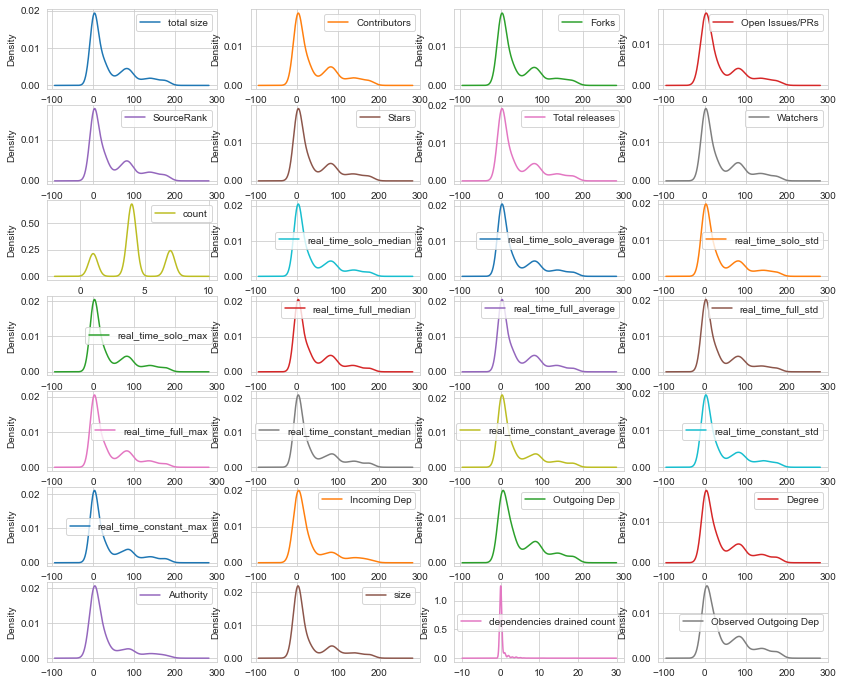

In [480]:
fig, axes = plt.subplots(nrows=7, ncols=4)
df1.plot(subplots=True, ax=axes, kind='kde')
fig.set_figheight(12)
fig.set_figwidth(14)

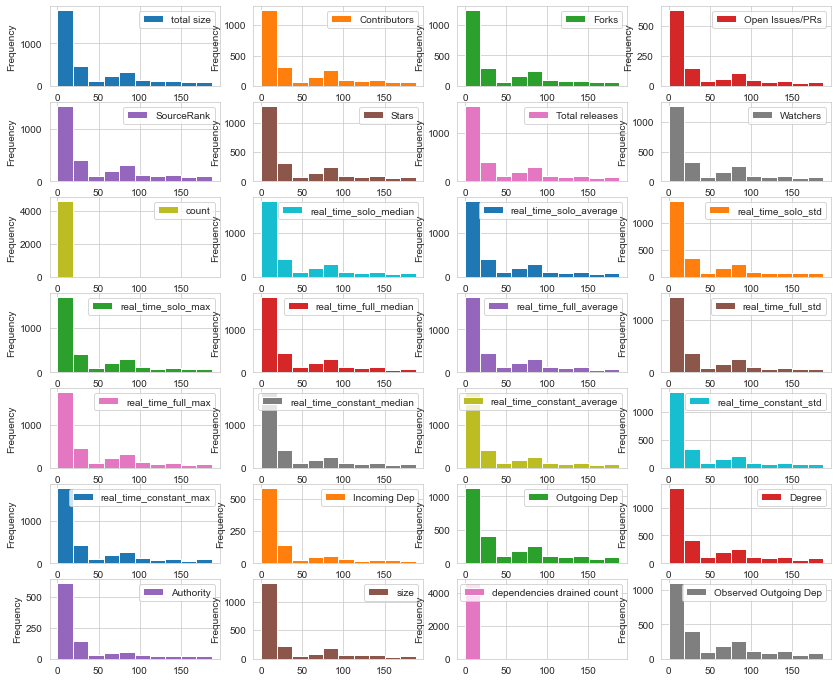

In [481]:
fig, axes = plt.subplots(nrows=7, ncols=4)
df1.plot(subplots=True, ax=axes, kind='hist')
fig.set_figheight(12)
fig.set_figwidth(14)

<a name='other'></a>
## 5. Other EDA

<br>

<a name='dep'></a>
## 6. Dependency Table and Iteration Tree Expansion

<br>

In [3]:
spec_df = pd.read_hdf('dependency_table.h5', 'df')

In [7]:
set_df = df.set_index("library")

In [8]:
set_df

,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,Version Number,...,real_time_constant_max,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep
library,,,,,,,,,,,,,,,,,,,,,
cutecharts,[jinja2],1.296,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,2.0,56.0,2.0,11.0,503.0,3.0,"[1.2.0, 1.1.0, 1.0.0]",...,0.757,"[markupsafe, jinja2]",0,2,0.000431,0.000000,0.188,[],0,2
postgres,"[psycopg2-binary, psycopg2-pool]",0.144,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,17.0,16.0,12.0,55.0,12.0,"[3.0.0, 2.2.2, 2.2.1, 2.2.0, 2.1.2, 2.1.1, 2.1...",...,0.760,"[psycopg2-pool, psycopg2-binary]",0,2,0.000431,0.000000,0.144,[],0,2
gpustat,"[six, nvidia-ml-py3, psutil, blessings]",1.864,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,10.0,202.0,23.0,16.0,2479.0,11.0,"[1.0.0b1, 0.6.0, 0.5.0, 0.4.1, 0.4.0, 0.3.2, 0...",...,0.743,"[psutil, blessings, six, nvidia-ml-py3]",1,4,0.001078,0.000017,0.088,[],0,4
df2gspread,"[argparse, google-api-python-client, gspread, ...",82.632,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,26.0,12.0,10.0,117.0,21.0,"[1.0.4, 1.0.3, 1.0.2, 1.0.1, 1.0.0, 0.2.5, 0.0...",...,1.105,"[idna, google-api-core, certifi, google-api-py...",0,31,0.006684,0.000000,0.000,[],0,31
ddeint,"[numpy, scipy]",87.040,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,4.0,NaN,4.0,"[0.2, 0.1.02, 0.1.01, 0.1.0]",...,0.790,"[scipy, numpy]",0,2,0.000431,0.000000,0.040,[],0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hep-ml,"[theano, numpy, pandas, six, scipy, scikit-learn]",157.900,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,8.0,48.0,NaN,11.0,131.0,7.0,"[0.6.2, 0.6.1, 0.6.0, 0.5.0, 0.4.0, 0.3.0, 0.2.0]",...,0.906,"[pytz, pandas, six, python-dateutil, threadpoo...",0,10,0.002156,0.000000,0.000,[],0,10
pyats.aetest,"[pyats.results, pyats.aereport, jinja2, pyats....",66.252,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,5.0,NaN,40.0,"[21.5.1, 21.5, 21.4, 21.3.1, 21.3, 21.2, 21.1,...",...,1.099,"[idna, dill, multidict, pycparser, psutil, asy...",7,37,0.009487,0.000074,39.512,"[async-lru, unicon.plugins, yamllint, pyats.co...",13,24
dicrivers,[],0.040,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,1.0,0.0,NaN,5.0,1.0,1.0,[0.0],...,0.784,[],0,0,0.000000,0.000000,0.040,[],0,0


Would be useful to have each library's complete dependencies included.

In [9]:
set_df.at["pandas", "dependencies full"]

['python-dateutil', 'numpy', 'six', 'pytz']

In [10]:
for i in spec_df.columns:
    try:
        targets = set_df.at[i, "dependencies full"]
        for t in targets:
            spec_df[t] = 1 - (1 - spec_df[i]) * (1 - spec_df[t])
    except:
        pass

In [11]:
spec_df = spec_df.transpose()

In [12]:
spec_df.to_hdf('dependency_table_final.h5', key='df', mode='w')

<a name='time'></a>
## 7. `col`: Time

<br>

In [6]:
q_df = df.set_index("library")

In [7]:
q_df["real_time_solo_median"]

library
cutecharts      0.901
postgres        0.915
gpustat         2.445
df2gspread      1.893
ddeint          1.547
                ...  
hep-ml          1.062
pyats.aetest    1.656
dicrivers       0.887
airr            1.645
census_area     0.945
Name: real_time_solo_median, Length: 4575, dtype: float64

True constant time should be `Solo - ((OutgoingDep) / (OutgoingDep + 1) * Constant)`

In [8]:
(q_df["Outgoing Dep"] - 1)

library
cutecharts       1
postgres         1
gpustat          3
df2gspread      30
ddeint           1
                ..
hep-ml           9
pyats.aetest    36
dicrivers       -1
airr             7
census_area     10
Name: Outgoing Dep, Length: 4575, dtype: int64

<AxesSubplot:>

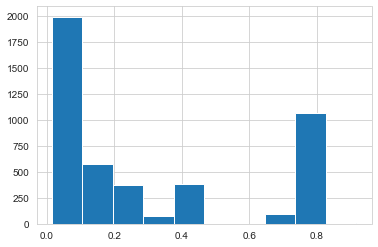

In [492]:
(q_df["real_time_constant_median"] / (q_df["Outgoing Dep"] + 1)).hist()

In [493]:
q_df["time"] = q_df["real_time_solo_median"] - ((q_df["Outgoing Dep"]) / (q_df["Outgoing Dep"] + 1) * q_df["real_time_constant_median"])

In [518]:
pack_q = q_df.to_json()
with open("pentagon_df.txt",'w') as f:
    json.dump(pack_q, f)

<a name='model1'></a>
## 8. Sample LANDLORD Setup

<br>

In [494]:
spec_df = pd.read_hdf('dependency_table_final.h5', 'df')
spec_df

,0,1,2,3,4,5,6,7,8,9,...,34410,34411,34412,34413,34414,34415,34416,34417,34418,34419
numpy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
pandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
fuzzywuzzy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bs4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
geopandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imdb-cli-tool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyforest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hpbandster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyswip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [495]:
q_df

,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,Version Number,...,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep,time
library,,,,,,,,,,,,,,,,,,,,,
cutecharts,[jinja2],1.296,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,2.0,56.0,2.0,11.0,503.0,3.0,"[1.2.0, 1.1.0, 1.0.0]",...,"[markupsafe, jinja2]",0,2,0.000431,0.000000,0.188,[],0,2,0.396333
postgres,"[psycopg2-binary, psycopg2-pool]",0.144,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,17.0,16.0,12.0,55.0,12.0,"[3.0.0, 2.2.2, 2.2.1, 2.2.0, 2.1.2, 2.1.1, 2.1...",...,"[psycopg2-pool, psycopg2-binary]",0,2,0.000431,0.000000,0.144,[],0,2,0.408333
gpustat,"[six, nvidia-ml-py3, psutil, blessings]",1.864,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,10.0,202.0,23.0,16.0,2479.0,11.0,"[1.0.0b1, 0.6.0, 0.5.0, 0.4.1, 0.4.0, 0.3.2, 0...",...,"[psutil, blessings, six, nvidia-ml-py3]",1,4,0.001078,0.000017,0.088,[],0,4,1.850600
df2gspread,"[argparse, google-api-python-client, gspread, ...",82.632,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,26.0,12.0,10.0,117.0,21.0,"[1.0.4, 1.0.3, 1.0.2, 1.0.1, 1.0.0, 0.2.5, 0.0...",...,"[idna, google-api-core, certifi, google-api-py...",0,31,0.006684,0.000000,0.000,[],0,31,0.822531
ddeint,"[numpy, scipy]",87.040,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,4.0,NaN,4.0,"[0.2, 0.1.02, 0.1.01, 0.1.0]",...,"[scipy, numpy]",0,2,0.000431,0.000000,0.040,[],0,2,1.020333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hep-ml,"[theano, numpy, pandas, six, scipy, scikit-learn]",157.900,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,8.0,48.0,NaN,11.0,131.0,7.0,"[0.6.2, 0.6.1, 0.6.0, 0.5.0, 0.4.0, 0.3.0, 0.2.0]",...,"[pytz, pandas, six, python-dateutil, threadpoo...",0,10,0.002156,0.000000,0.000,[],0,10,0.289273
pyats.aetest,"[pyats.results, pyats.aereport, jinja2, pyats....",66.252,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,5.0,NaN,40.0,"[21.5.1, 21.5, 21.4, 21.3.1, 21.3, 21.2, 21.1,...",...,"[idna, dill, multidict, pycparser, psutil, asy...",7,37,0.009487,0.000074,39.512,"[async-lru, unicon.plugins, yamllint, pyats.co...",13,24,0.622921
dicrivers,[],0.040,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,1.0,0.0,NaN,5.0,1.0,1.0,[0.0],...,[],0,0,0.000000,0.000000,0.040,[],0,0,0.887000


In [496]:
test_df = spec_df.iloc[:, 0:700]
test_df

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
numpy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
fuzzywuzzy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bs4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
geopandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imdb-cli-tool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyforest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hpbandster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyswip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Similarity between two recipes/columns:

In [497]:
def cosine_sim(c1, c2):
    return 1 - cosine(c1, c2)

Combine two recipes/columns:

In [498]:
def combine_col(c1, c2):
    return 1 - (1 - c1) * (1 - c2)

Check if all of c1 is contained in c2:

In [499]:
def contains_image(c1, c2):
    # Previous command that resulted in huge runtime increase
    # set(c1[c1 == 1].index)
    
    s = set(c1.to_numpy().nonzero()[0])
    image = set(c2.to_numpy().nonzero()[0])
    
    is_subset = s.issubset(image)
    return is_subset
    

In [500]:
cosine_sim(spec_df[0], spec_df[1])

0.3851644432598216

In [501]:
(1 - spec_df[0]) * (1 - spec_df[1])

numpy            0.0
pandas           0.0
fuzzywuzzy       0.0
bs4              0.0
geopandas        0.0
                ... 
imdb-cli-tool    1.0
pyforest         1.0
hpbandster       1.0
pyswip           1.0
gputil           1.0
Length: 5190, dtype: float64

First model

In [502]:
def MODEL_naive_similarity(df, α):
    start = time.time()
    I = []
    for col in df.columns:
        caught = False
        for i in I:
            if contains_image(df[col], i):
                caught = True
                break
        if not caught:
            for i in np.arange(len(I)):
                if cosine_sim(df[col], I[i]) > α:
                    I[i] = combine_col(df[col], I[i])
                    caught = True
                    break
        if not caught:
            I.append(df[col])
    end = time.time()
    print(end - start)
    return I

In [503]:
I = MODEL_naive_similarity(test_df, 0.6)

0.9635040760040283


In [504]:
cProfile.run('MODEL_naive_similarity(test_df, 0.6)')

1.1498198509216309
         960343 function calls (934939 primitive calls) in 1.150 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     6030    0.004    0.000    0.019    0.000 <__array_function__ internals>:2(atleast_1d)
     9045    0.006    0.000    0.134    0.000 <__array_function__ internals>:2(average)
      856    0.001    0.000    0.001    0.000 <frozen importlib._bootstrap>:1017(_handle_fromlist)
     3015    0.003    0.000    0.313    0.000 <ipython-input-497-fe6a290dee0c>:1(cosine_sim)
      107    0.001    0.000    0.082    0.001 <ipython-input-498-377e2f748e02>:1(combine_col)
     8518    0.086    0.000    0.667    0.000 <ipython-input-499-1505dc876348>:1(contains_image)
        1    0.023    0.023    1.150    1.150 <ipython-input-502-5c256ea21a2f>:1(MODEL_naive_similarity)
        1    0.000    0.000    1.150    1.150 <string>:1(<module>)
      428    0.000    0.000    0.001    0.000 __init__.py:132(align_met

In [505]:
len(I)

58

In [506]:
spec_df

,0,1,2,3,4,5,6,7,8,9,...,34410,34411,34412,34413,34414,34415,34416,34417,34418,34419
numpy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
pandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
fuzzywuzzy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bs4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
geopandas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imdb-cli-tool,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyforest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hpbandster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pyswip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Getting df rows from a set (ex. I[0])

In [507]:
spec_df.iloc[I[0].to_numpy().nonzero()[0]].index

Index(['numpy', 'pandas', 'fuzzywuzzy', 'bs4', 'geopandas', 'pycountry',
       'matplotlib', 'seaborn', 'bokeh', 'sklearn', 'xlrd', 'requests',
       'beautifulsoup4', 'scipy', 'attrs', 'certifi', 'chardet', 'click',
       'jinja2', 'markupsafe', 'pillow', 'pyparsing', 'pyrsistent',
       'python-dateutil', 'pytz', 'tornado', 'zipp', 'urllib3', 'flask',
       'packaging', 'cycler', 'kiwisolver', 'six', 'scikit-learn', 'folium',
       'json', 'idna', 'importlib-metadata', 'werkzeug', 'wordcloud', 'nltk',
       'click-plugins', 'cligj', 'munch', 'pyproj', 'shapely', 'setuptools',
       'numexpr', 'descartes', 'tqdm', 'joblib', 'threadpoolctl',
       'currencyconverter', 'regex', 'itsdangerous', 'fiona', 'oasislmf',
       'pyyaml', 'arrow', 'branca', 'soupsieve', 'typing-extensions',
       'dataclasses', 'jinja2-time', 'requests-toolbelt', 'text-unidecode'],
      dtype='object')

In [508]:
q_df.index

Index(['cutecharts', 'postgres', 'gpustat', 'df2gspread', 'ddeint',
       'humanfriendly', 'django-easy-timezones', 'skypy', 'alpaca-trade-api',
       'seuif97',
       ...
       'azureml-accel-models', 'algopy', 'jupyter-themer', 'pandas_ml',
       'jwcrypto', 'hep-ml', 'pyats.aetest', 'dicrivers', 'airr',
       'census_area'],
      dtype='object', name='library', length=4575)

In [509]:
q_df.loc[[a for a in spec_df.iloc[I[0].to_numpy().nonzero()[0]].index if a in q_df.index]].head()

,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,Version Number,...,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep,time
library,,,,,,,,,,,,,,,,,,,,,
numpy,[],25.000,25M /home/ubuntu/ve/randomenv/lib/python3.6/si...,736.0,5616.0,2333.0,29.0,17445.0,101.0,"[1.21.0, 1.21.0rc2, 1.21.0rc1, 1.20.3, 1.20.2,...",...,[],1583,0,0.341311,0.014174,25.000,[],0,0,3.152000
pandas,"[python-dateutil, numpy, pytz]",74.800,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,970.0,12560.0,3669.0,28.0,30122.0,93.0,"[1.2.5, 1.3.0rc1, 1.2.4, 1.2.3, 1.2.2, 1.2.1, ...",...,"[python-dateutil, numpy, six, pytz]",639,4,0.138637,0.008430,47.000,[],0,4,3.219300
fuzzywuzzy,[],0.084,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,62.0,826.0,NaN,19.0,7990.0,27.0,"[0.18.0, 0.17.0, 0.16.0, 0.15.1, 0.15.0, 0.14....",...,[],4,0,0.000862,0.000033,0.084,[],0,0,0.899000
bs4,[beautifulsoup4],1.084,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,12.0,NaN,5.0,"[1.2.7, 1.2.6, 1.2.5, 0.0.1, 0.0.0]",...,"[soupsieve, beautifulsoup4]",11,2,0.002803,0.000094,0.856,[],0,2,1.041000
geopandas,"[fiona, pandas, pyproj, shapely]",106.676,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,13.0,NaN,37.0,"[0.9.0, 0.8.2, 0.8.1, 0.8.0, 0.7.0, 0.6.3, 0.6...",...,"[cligj, setuptools, pytz, pandas, six, click, ...",36,18,0.011643,0.000621,2.700,[],0,18,0.408158


In [510]:
#q_df.loc[[a for a in spec_df.iloc[I[0].to_numpy().nonzero()[0]].index if a in q_df.index]]["dependencies full"].apply(pd.Series).stack().reset_index(drop=True)[0:50]

In [511]:
#I[0][I[0]==1]

In [512]:
q_df

,dependencies,total size,size_full,Contributors,Forks,Open Issues/PRs,SourceRank,Stars,Total releases,Version Number,...,dependencies full,Incoming Dep,Outgoing Dep,Degree,Authority,size,dependencies drained,dependencies drained count,Observed Outgoing Dep,time
library,,,,,,,,,,,,,,,,,,,,,
cutecharts,[jinja2],1.296,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,2.0,56.0,2.0,11.0,503.0,3.0,"[1.2.0, 1.1.0, 1.0.0]",...,"[markupsafe, jinja2]",0,2,0.000431,0.000000,0.188,[],0,2,0.396333
postgres,"[psycopg2-binary, psycopg2-pool]",0.144,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,17.0,16.0,12.0,55.0,12.0,"[3.0.0, 2.2.2, 2.2.1, 2.2.0, 2.1.2, 2.1.1, 2.1...",...,"[psycopg2-pool, psycopg2-binary]",0,2,0.000431,0.000000,0.144,[],0,2,0.408333
gpustat,"[six, nvidia-ml-py3, psutil, blessings]",1.864,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,10.0,202.0,23.0,16.0,2479.0,11.0,"[1.0.0b1, 0.6.0, 0.5.0, 0.4.1, 0.4.0, 0.3.2, 0...",...,"[psutil, blessings, six, nvidia-ml-py3]",1,4,0.001078,0.000017,0.088,[],0,4,1.850600
df2gspread,"[argparse, google-api-python-client, gspread, ...",82.632,47M /home/ubuntu/ve/randomenv/lib/python3.6/si...,6.0,26.0,12.0,10.0,117.0,21.0,"[1.0.4, 1.0.3, 1.0.2, 1.0.1, 1.0.0, 0.2.5, 0.0...",...,"[idna, google-api-core, certifi, google-api-py...",0,31,0.006684,0.000000,0.000,[],0,31,0.822531
ddeint,"[numpy, scipy]",87.040,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,4.0,NaN,4.0,"[0.2, 0.1.02, 0.1.01, 0.1.0]",...,"[scipy, numpy]",0,2,0.000431,0.000000,0.040,[],0,2,1.020333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hep-ml,"[theano, numpy, pandas, six, scipy, scikit-learn]",157.900,62M /home/ubuntu/ve/randomenv/lib/python3.6/si...,8.0,48.0,NaN,11.0,131.0,7.0,"[0.6.2, 0.6.1, 0.6.0, 0.5.0, 0.4.0, 0.3.0, 0.2.0]",...,"[pytz, pandas, six, python-dateutil, threadpoo...",0,10,0.002156,0.000000,0.000,[],0,10,0.289273
pyats.aetest,"[pyats.results, pyats.aereport, jinja2, pyats....",66.252,39M /home/ubuntu/ve/randomenv/lib/python3.6/si...,NaN,NaN,NaN,5.0,NaN,40.0,"[21.5.1, 21.5, 21.4, 21.3.1, 21.3, 21.2, 21.1,...",...,"[idna, dill, multidict, pycparser, psutil, asy...",7,37,0.009487,0.000074,39.512,"[async-lru, unicon.plugins, yamllint, pyats.co...",13,24,0.622921
dicrivers,[],0.040,11M /home/ubuntu/ve/randomenv/lib/python3.6/si...,1.0,0.0,NaN,5.0,1.0,1.0,[0.0],...,[],0,0,0.000000,0.000000,0.040,[],0,0,0.887000


In [513]:
def result_model(I):
    size_total, time_total = 0, 0
    size_max = 0
    for i in I:
        temp_df = q_df.loc[[a for a in spec_df.iloc[i.to_numpy().nonzero()[0]].index if a in q_df.index]]
        i_size = np.sum(temp_df["size"])
        size_total += i_size
        time_total += np.sum(temp_df["time"])
        if i_size > size_max:
            size_max = i_size
        
    return size_total, time_total, size_max

result_model(I)

(32943.420000000006, 3339.039118151457, 5249.523999999999)

In [514]:
def iterate_model():
    alpha = np.arange(0, 1, 0.05)
    size_list, time_list = [], []
    size_max = []
    for a in alpha:
        I = MODEL_naive_similarity(test_df, a)
        s_tot, t_tot, s_max = result_model(I)
        size_list.append(s_tot)
        time_list.append(t_tot)
        size_max.append(s_max)
    return alpha.tolist(), size_list, time_list, size_max

In [515]:
alpha_list, size_list, time_list, size_max = iterate_model()

0.2653467655181885
0.208953857421875
0.23093080520629883
0.2402338981628418
0.25803494453430176
0.2914459705352783
0.31229305267333984
0.3847930431365967
0.48591017723083496
0.5526330471038818
0.6625950336456299
0.7627530097961426
1.0387299060821533
1.2270159721374512
1.4448769092559814
1.7565691471099854
2.086204767227173
2.5016510486602783
3.1360831260681152
3.767728090286255


<AxesSubplot:>

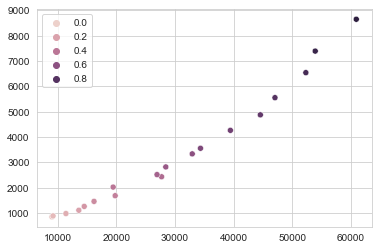

In [516]:
sns.scatterplot(x = size_list, y = time_list, hue = alpha_list)

<AxesSubplot:>

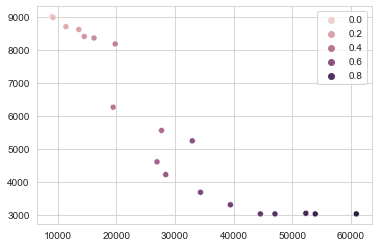

In [517]:
sns.scatterplot(x = size_list, y = size_max, hue = alpha_list)